In [1]:
# import lib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
# load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
# define the model-building function with optional dropout
def build_model(use_dropout=False):
    model = keras.Sequential()
    model.add(layers.Input(shape=(32, 32, 3)))

    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))

    if use_dropout:
        model.add(layers.Dropout(0.5))  # apply dropout after dense layer

    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [4]:
# train baseline model (no dropout)
baseline_model = build_model(use_dropout=False)
history_baseline = baseline_model.fit(x_train, y_train,
                                      validation_split=0.2,
                                      epochs=10, batch_size=64, verbose=0)

In [5]:
# train dropout model
dropout_model = build_model(use_dropout=True)
history_dropout = dropout_model.fit(x_train, y_train,
                                    validation_split=0.2,
                                    epochs=10, batch_size=64, verbose=0)

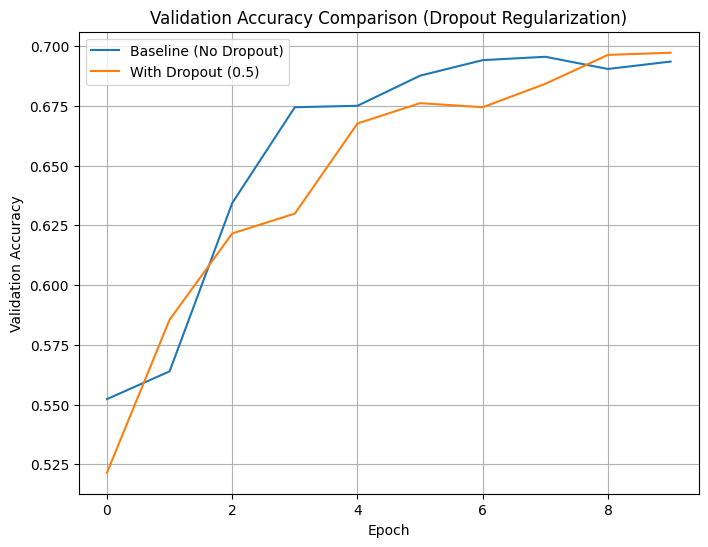

In [6]:
# plot A/B comparison
plt.figure(figsize=(8,6))
plt.plot(history_baseline.history['val_accuracy'], label='Baseline (No Dropout)')
plt.plot(history_dropout.history['val_accuracy'], label='With Dropout (0.5)')
plt.title('Validation Accuracy Comparison (Dropout Regularization)')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# evaluate both models on test data
test_loss_base, test_acc_base = baseline_model.evaluate(x_test, y_test, verbose=0)
test_loss_drop, test_acc_drop = dropout_model.evaluate(x_test, y_test, verbose=0)

print(f"Test Accuracy - Baseline: {test_acc_base:.4f}")
print(f"Test Accuracy - Dropout:  {test_acc_drop:.4f}")

Test Accuracy - Baseline: 0.6921
Test Accuracy - Dropout:  0.6909
